<a href="https://colab.research.google.com/github/sofial47/senalesysistemas/blob/main/cuaderno_1_Respuesta_Impulso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caracterización de sistemas lineales e invariantes en el tiempo

## Respuesta al Impulso

- La respuesta $y(t)$ de un sistema lineal e invariante en el tiempo (SLIT) $\mathsf{H}\{\cdot\}$ respecto a una señal de entrada arbitraria $x(t),$ se puede obtner con base a la integral de convolución utilizando la [respuesta al impulso](https://en.wikipedia.org/wiki/Linear_time-invariant_system).

- La señal de entrada se puede representar como una integral cuando se aplica la propiedad de selectividad del impulso de Dirac:

\begin{equation}
x(t) = \int_{-\infty}^{\infty} x(\tau) \cdot \delta(t-\tau) \; d \tau
\end{equation}

- Empleando la relación anterior para la señal de entrada $x(t)$ sobre la señal de salida $y(t)=\mathsf{H}\{x(t)\}$ del sistema, se tiene que:

\begin{equation}
y(t) = \mathsf{H} \left\{ \int_{-\infty}^{\infty} x(\tau) \cdot \delta(t-\tau) \; d \tau \right\}
\end{equation}

donde $\mathsf{H}\{\cdot\}$ denota el operador de respuesta del sistema. El operador de integración y respuesta del sistema se pueden intercambiar bajo el supuesto de que el sistema es lineal:

\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot \mathsf{H} \left\{ \delta(t-\tau) \right\} \; d \tau
\end{equation}

donde $\mathsf{H}\{\cdot\}$ solo se aplica al impulso de Dirac, ya que $x(\tau)$ puede considerarse como un factor constante con respecto al tiempo $t$. Se hace evidente que la respuesta de un sistema a un impulso de Dirac juega un papel importante en el cálculo de la señal de salida para señales de entrada arbitrarias.

La respuesta de un sistema ante un impulso de dirac como entrada, se denomina [*respuesta al impulso*](https://en.wikipedia.org/wiki/Impulse_response). Se define como

\begin{equation}
h(t) = \mathsf{H} \left\{ \delta(t) \right\}
\end{equation}

Si el sistema es invariante en el tiempo, la respuesta a un impulso Dirac desplazado es $\mathsf{H}\left\{\delta(t-\tau)\right\} = h(t-\tau)$. Por lo tanto, para un SLIT se tiene que:

\begin{equation}
y(t) = \int_{-\infty}^{\infty}  x(\tau) \cdot h(t-\tau) \; d \tau
\end{equation}

La anterior operación se relaciona directamente con el operador [*convolución*](https://en.wikipedia.org/wiki/Convolution), definido $y(t)=x(t)*h(t)$.

Se puede concluir que las propiedades de un SLIT están completamente caracterizadas por su respuesta al impulso.

La respuesta $y(t)$ de un sistema a una señal de entrada arbitraria $x(t)$ está dada por la convolución de la señal de entrada $x(t)$ con su respuesta de impulso $h(t)$.

**Ejemplo**

El siguiente ejemplo considera un SLIT cuya relación entre la entrada $x(t)$ y la salida $y(t)$ está dada por una ecuación diferencial ordinaria (EDO) con coeficientes constantes

\begin{equation}
\frac{d}{dt} y(t)+ y(t) = x(t)
\end{equation}

La respuesta del sistema para la señal de entrada $x(t)=e^{-2t}\cdot\epsilon(t)$ se puede calcular mediante:

1. Se resuelve la [EDO](https://en.wikipedia.org/wiki/Ordinary_differential_equation).
2. Se calcula la respuesta al impulso $h(t)$ y se realiza la convolución con la entrada.

Generalmente se asumen condiciones iniciales $y(t)\big\vert_{t=0-}=0$ y $\frac{d}{dt}y(t)\big\vert_{t=0-}=0 $.

Primero, se define la EDO en `SymPy`

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()#epresiones matematicas mas legibles

t = sym.symbols('t', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(y + y.diff(t) , x)#definir ecuacion en simpy con operador diferencial diff; toma lado derecho e izquierdo de la ecuacion, y.diff(d/dt y(t)); (es lo que se muestra abajo)
ode

       d              
y(t) + ──(y(t)) = x(t)
       dt             

La EDO se resuelve para la señal de entrada dada con el fin de calcular la señal de salida. La constante de integración se calcula de forma que la solución cumpla las condiciones iniciales.

In [ ]:
solution = sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))#resolver edo ante entrada x(t), sym.dsolve resuelve ecuaciones diferenciales; sustituye x por e^-2t*E; queda al final y(t)+d/dty(t)=e^-2t*E
#se definin condiciones iniciales 0
integration_constants = sym.solve( (solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1' )#objetivo encontrar el valor constante C1# solution.rhs.limit(t, 0, '-'): limite del lado derecho de la solución a medida que t se acerca a 0 desde valores negativos (0-). Representa el valor de la solución justo antes de t=0; solution.rhs.diff(t): calcula la derivada del lado derecho de la solución con respecto a t; .limit(t, 0, '-'):calcula el límite de esta derivada a medida que t se acerca a 0 desde valores negativos. se calcula el limite de la funcion y el limite de su derivada y se agrupan en una tupla (parentesis morado)
#sym.solve(expresion, variable), SymPy asume que quiero encontrar el valor de variable tal que expresion == 0. sym.solve asume que quiero encontrar el valor de C1 que hace que cada una de esas expresiones sea igual a cero simultáneamente= solution.rhs.limit(t, 0, '-') == 0 y solution.rhs.diff(t).limit(t, 0, '-') == 0
y1 = solution.subs(integration_constants)
y1

       ⎛        -t     ⎞  -t
y(t) = ⎝θ(t) - ℯ  ⋅θ(t)⎠⋅ℯ  

Se grafica la solución de la EDO

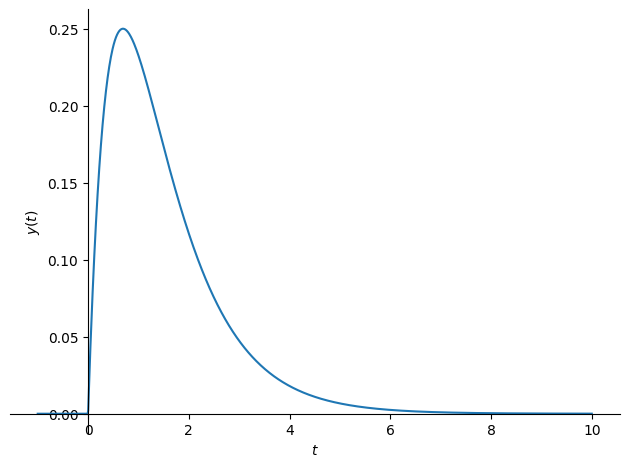

In [ ]:
sym.plot(y1.rhs, (t,-1,10), ylabel=r'$y(t)$');#.rhs se utiliza para obtener el lado derecho de la ecuación(Right-Hand Side) .

La respuesta al impulso $h(t)$ se puede calcular resolviendo la EDO para un impulso de Dirac como señal de entrada, $x(t)=\delta(t)$.

In [ ]:
h = sym.Function('h')(t)#h depende de t
solution2 = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))#resolver para delta dirac
integration_constants = sym.solve( (solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1' )
h = solution2.subs(integration_constants)
h

        -t     
h(t) = ℯ  ⋅θ(t)

Se grafica la respuesta al impulso $h(t)$ del SLIT:

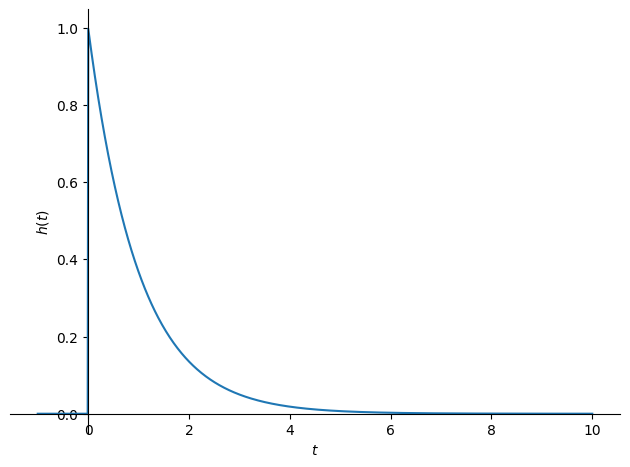

In [ ]:
sym.plot(h.rhs, (t,-1,10), ylabel=r'$h(t)$');

Como alternativa a la solución explícita de la EDO, la respuesta del sistema se calcula evaluando la convolución $y(t)=x(t)*h(t)$.

**Nota**:Dado que `SymPy` no puede manejar la función Heaviside de manera adecuada en las integrales, la integral de convolución se simplifica primero. Tanto la señal de entrada $x(t)$ como la respuesta de impulso $h(t)$ son señales causales. Por lo tanto, la integral de convolución resulta en

\begin{equation}
y(t) = \int_{0}^{t} x(\tau) \cdot h(t - \tau) \; d\tau
\end{equation}

Para $t\geq0$. Observe que $y(t)=0$ para $t<0$.

In [ ]:
tau = sym.symbols('tau', real=True)

y2 = sym.integrate(sym.exp(-2*tau) * h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))#subs sustituye t por (t-tau); h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau) construye el término h(t-tau) para la integral de convolución, realizando una sustitución simplificada de la función Heaviside(t) por 1 (válida para t>=0, se integra con respecto a tau desde o hasta t
y2

 -t    -2⋅t
ℯ   - ℯ    

Se grafica la señal de salida obtenida mediante el proceso de convolución:

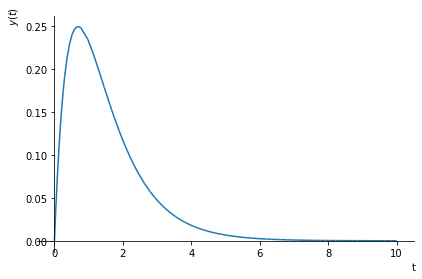

In [ ]:
sym.plot(y2, (t,0,10), ylabel=r'$y(t)$');

**Ejercicio**

* Compare la señal de salida obtenida al resolver la EDO con la obtenida mediante la convolución. Son iguales?
* Compruebe la solución $h(t)$ de la EDO cuando $x(t)=\delta(t)$ de manera manual. Tener en cuenta que $\frac{d}{dt} \epsilon(t) = \delta(t)$.
* Comprobar la solución de la integral de convolución de manera manual. Tener en cuenta las funciones Heaviside.

* Sí son iguales. Esto se alinea con la teoría de los Sistemas Lineales e Invariantes en el Tiempo (SLIT) presentada anteriormente en este cuaderno, donde se establece que la respuesta de un SLIT a cualquier entrada puede obtenerse mediante la convolución de la entrada con la respuesta al impulso del sistema, la cual, a su vez, se puede derivar de la EDO del sistema. Ambos métodos son formas equivalentes de caracterizar y encontrar la respuesta de un SLIT
* La EDO dada es: $$ \frac{d}{dt} y(t) + y(t) = x(t) $$
Para encontrar la respuesta al impulso, hacemos $x(t) = \delta(t)$ y $y(t) = h(t)$: $$ \frac{d}{dt} h(t) + h(t) = \delta(t) $$
Sabemos que la respuesta al impulso de un sistema causal (como el que se considera aquí, con condiciones iniciales cero para $t<0$) tendrá la forma $h(t) = C e^{-at} \epsilon(t)$ para $t \geq 0$. En este caso, mirando la forma de la EDO, podemos suponer que $a=1$, por lo tanto proponemos una solución de la forma $h(t) = C e^{-t} \epsilon(t)$.

Ahora se deriva $h(t)$ usando la regla del producto y la propiedad de que $\frac{d}{dt}\epsilon(t) = \delta(t)$: $$ \frac{d}{dt} h(t) = \frac{d}{dt} (C e^{-t} \epsilon(t)) $$ $$ \frac{d}{dt} h(t) = C \left( \frac{d}{dt}(e^{-t}) \epsilon(t) + e^{-t} \frac{d}{dt}(\epsilon(t)) \right) $$ $$ \frac{d}{dt} h(t) = C \left( -e^{-t} \epsilon(t) + e^{-t} \delta(t) \right) $$
Sustituimos esta derivada y la forma propuesta de $h(t)$ de vuelta en la EDO: $$ C \left( -e^{-t} \epsilon(t) + e^{-t} \delta(t) \right) + C e^{-t} \epsilon(t) = \delta(t) $$
Simplificando la expresión: $$ -C e^{-t} \epsilon(t) + C e^{-t} \delta(t) + C e^{-t} \epsilon(t) = \delta(t) $$ $$ C e^{-t} \delta(t) = \delta(t) $$
Se sabe que por la propiedad de muestreo del impulso de Dirac que $f(t) \delta(t) = f(0) \delta(t)$. En este caso, $f(t) = e^{-t}$, por lo que $e^{-t} \delta(t) = e^{-0} \delta(t) = 1 \cdot \delta(t) = \delta(t)$.

Sustituyendo esto en la ecuación anterior: $$ C \delta(t) = \delta(t) $$
Para que esta igualdad se cumpla, el valor de la constante $C$ debe ser 1.

Por lo tanto, la solución manual para la respuesta al impulso es: $$ h(t) = 1 \cdot e^{-t} \epsilon(t) = e^{-t} \epsilon(t) $$

* Solución de la integral de convolución $y(t) = x(t) * h(t)$ para el ejemplo dado, teniendo en cuenta las funciones Heaviside.

La señal de entrada es $x(t) = e^{-2t} \epsilon(t)$ y la respuesta al impulso es $h(t) = e^{-t} \epsilon(t)$.

La integral de convolución general es: $$ y(t) = \int_{-\infty}^{\infty} x(\tau) h(t-\tau) d\tau $$
Sustituimos las expresiones de $x(\tau)$ y $h(t-\tau)$: $$ y(t) = \int_{-\infty}^{\infty} \left( e^{-2\tau} \epsilon(\tau) \right) \left( e^{-(t-\tau)} \epsilon(t-\tau) \right) d\tau $$
Ahora, vamos a considerar el efecto de las funciones Heaviside $\epsilon(\tau)$ y $\epsilon(t-\tau)$:

$\epsilon(\tau)$: Esta función es 1 cuando $\tau \geq 0$ y 0 cuando $\tau < 0$. Esto significa que la integral solo tendrá un valor no nulo cuando $\tau \geq 0$. El límite inferior de la integral se convierte en 0.

$\epsilon(t-\tau)$: Esta función es 1 cuando $t-\tau \geq 0$, lo que implica $\tau \leq t$. Es 0 cuando $t-\tau < 0$, lo que implica $\tau > t$. Significa que la integral solo tendrá un valor no nulo cuando $\tau \leq t$.

Combinando ambas condiciones, la integral solo tiene contribución cuando $0 \leq \tau \leq t$. La integral de convolución se simplifica a:

Para $t \geq 0$: $$ y(t) = \int_{0}^{t} e^{-2\tau} e^{-(t-\tau)} d\tau $$
Para $t < 0$, la región de integración ($0 \leq \tau \leq t$) no existe, por lo que $y(t) = 0$.

Empezamos a resolver la integral para $t \geq 0$: $$ y(t) = \int_{0}^{t} e^{-2\tau} e^{-t} e^{\tau} d\tau $$ Podemos sacar $e^{-t}$ fuera de la integral, ya que no depende de $\tau$: $$ y(t) = e^{-t} \int_{0}^{t} e^{-2\tau} e^{\tau} d\tau $$ $$ y(t) = e^{-t} \int_{0}^{t} e^{-2\tau + \tau} d\tau $$ $$ y(t) = e^{-t} \int_{0}^{t} e^{-\tau} d\tau $$
Ahora integramos $e^{-\tau}$con respecto a $\tau$: $$ y(t) = e^{-t} \left[ -e^{-\tau} \right]_{0}^{t} $$
Evaluamos en los límites de integración: $$ y(t) = e^{-t} \left( (-e^{-t}) - (-e^{-0}) \right) $$ $$ y(t) = e^{-t} \left( -e^{-t} + e^{0} \right) $$ $$ y(t) = e^{-t} \left( -e^{-t} + 1 \right) $$
Expandimos la expresión: $$ y(t) = -e^{-t} e^{-t} + e^{-t} \cdot 1 $$ $$ y(t) = -e^{-2t} + e^{-t} $$ $$ y(t) = e^{-t} - e^{-2t} $$
Recordando que esta solución es válida solo para $t \geq 0$, y que $y(t)=0$ para $t < 0$, podemos expresar la solución completa utilizando la función Heaviside:
$$ y(t) = (e^{-t} - e^{-2t}) \epsilon(t) $$
Esta es la misma solución obtenida en el cuaderno al resolver la EDO.



**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.